In [2]:
# Knn is a lazy instance based ML model that is used  to classification and regression the maiiin goal is the output for a new point find the
# kak closedest level and used  thair labels majority vote for  classification
# and  avg. used for regression.
# knn is supervised ML algorithm

# HOW KNN works 
# 1) store the training data than choose the nearest K and a distance than process the  features 
# scale  oor standerdize  
# compute distance from the test sample  
# then short the trainig sample by distance and pic the top K
# than for classification take the majority labels among those K n and for regrassion take the avg. of the neghibours target values


In [3]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    iris_dataset["data"],iris_dataset["target"],random_state=0
)

In [5]:
!pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 581.4/581.4 kB 4.9 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [imageio]
   ---------------------------------------- 0/2 [imageio]
   ---------------------------------------- 0/2 [imageio]
   ---------------------------------------- 0/2 [imageio]
   ---------------------------------------- 0/2 [imageio]
   ---------------------------------------- 0/2 [imageio]
   ---------------------------------------- 0/2 [imageio]
   ---------------------------------------- 0/2 [imageio]
   ---------------------------------------- 0/2 [imageio]
   -------------------- ------------------- 1/2 [mglearn]
   -------------------- ------------------- 1/2 [mglearn]
   -------------------- ------------------- 1/2 [mglearn]
   -------------------- ------------------- 1/2 [mglearn]
   ---------------------------------------- 2/2 [mglearn]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import mglearn

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

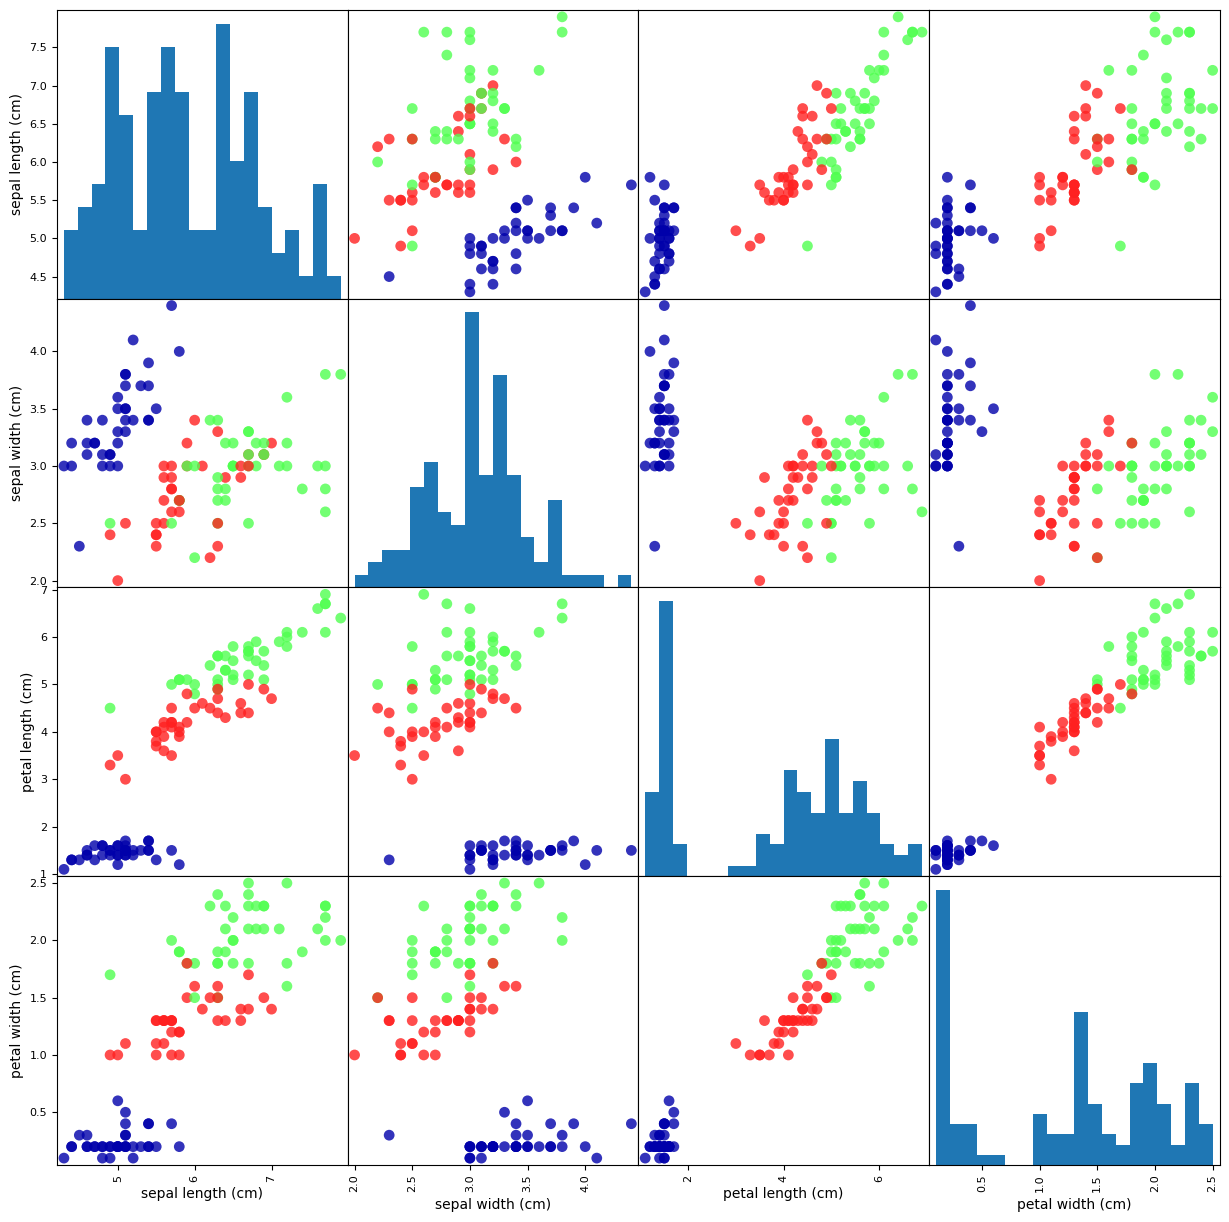

In [7]:
iris_dataframe=pd.DataFrame(x_train,columns=iris_dataset.feature_names)
#create a scatter from the dataframe, colourby y_train
pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),
                          marker='o',hist_kwds={'bins':20},s=60,
                          alpha=.8,cmap=mglearn.cm3)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(x_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
prediction=knn.predict(x_test)
print("prediction",prediction)
print("predicted taget name: ",
     iris_dataset["target_names"][prediction])

prediction [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
predicted taget name:  ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [16]:
df=pd.read_csv("covid_toy - covid_toy.csv")
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [18]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()

In [19]:
df["fever"]=si.fit_transform(df[["fever"]])

In [21]:
# df.isnull().sum()

In [22]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [23]:
df['gender']=lb.fit_transform(df["gender"])
df['cough']=lb.fit_transform(df["cough"])
df['city']=lb.fit_transform(df["city"])
df['has_covid']=lb.fit_transform(df["has_covid"])


In [24]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1
2,42,1,101.0,0,1,0
3,31,0,98.0,0,2,0
4,65,0,101.0,0,3,0


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    df.drop(columns=["has_covid"]),df["has_covid"],test_size=.02,random_state=0
)

In [27]:
x_train.head()

,age,gender,fever,cough,city
2,42,1,101.0,0,1
55,81,0,101.0,0,3
75,5,1,102.0,0,2
93,27,1,100.0,0,2
16,69,0,103.0,0,2


In [26]:
import mglearn

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='gender', ylabel='age'>,
        <Axes: xlabel='fever', ylabel='age'>,
        <Axes: xlabel='cough', ylabel='age'>,
        <Axes: xlabel='city', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='gender'>,
        <Axes: xlabel='gender', ylabel='gender'>,
        <Axes: xlabel='fever', ylabel='gender'>,
        <Axes: xlabel='cough', ylabel='gender'>,
        <Axes: xlabel='city', ylabel='gender'>],
       [<Axes: xlabel='age', ylabel='fever'>,
        <Axes: xlabel='gender', ylabel='fever'>,
        <Axes: xlabel='fever', ylabel='fever'>,
        <Axes: xlabel='cough', ylabel='fever'>,
        <Axes: xlabel='city', ylabel='fever'>],
       [<Axes: xlabel='age', ylabel='cough'>,
        <Axes: xlabel='gender', ylabel='cough'>,
        <Axes: xlabel='fever', ylabel='cough'>,
        <Axes: xlabel='cough', ylabel='cough'>,
        <Axes: xlabel='city', ylabel='cough'>],
       [<Axes: xlabel='age', ylabel='city'>,
    

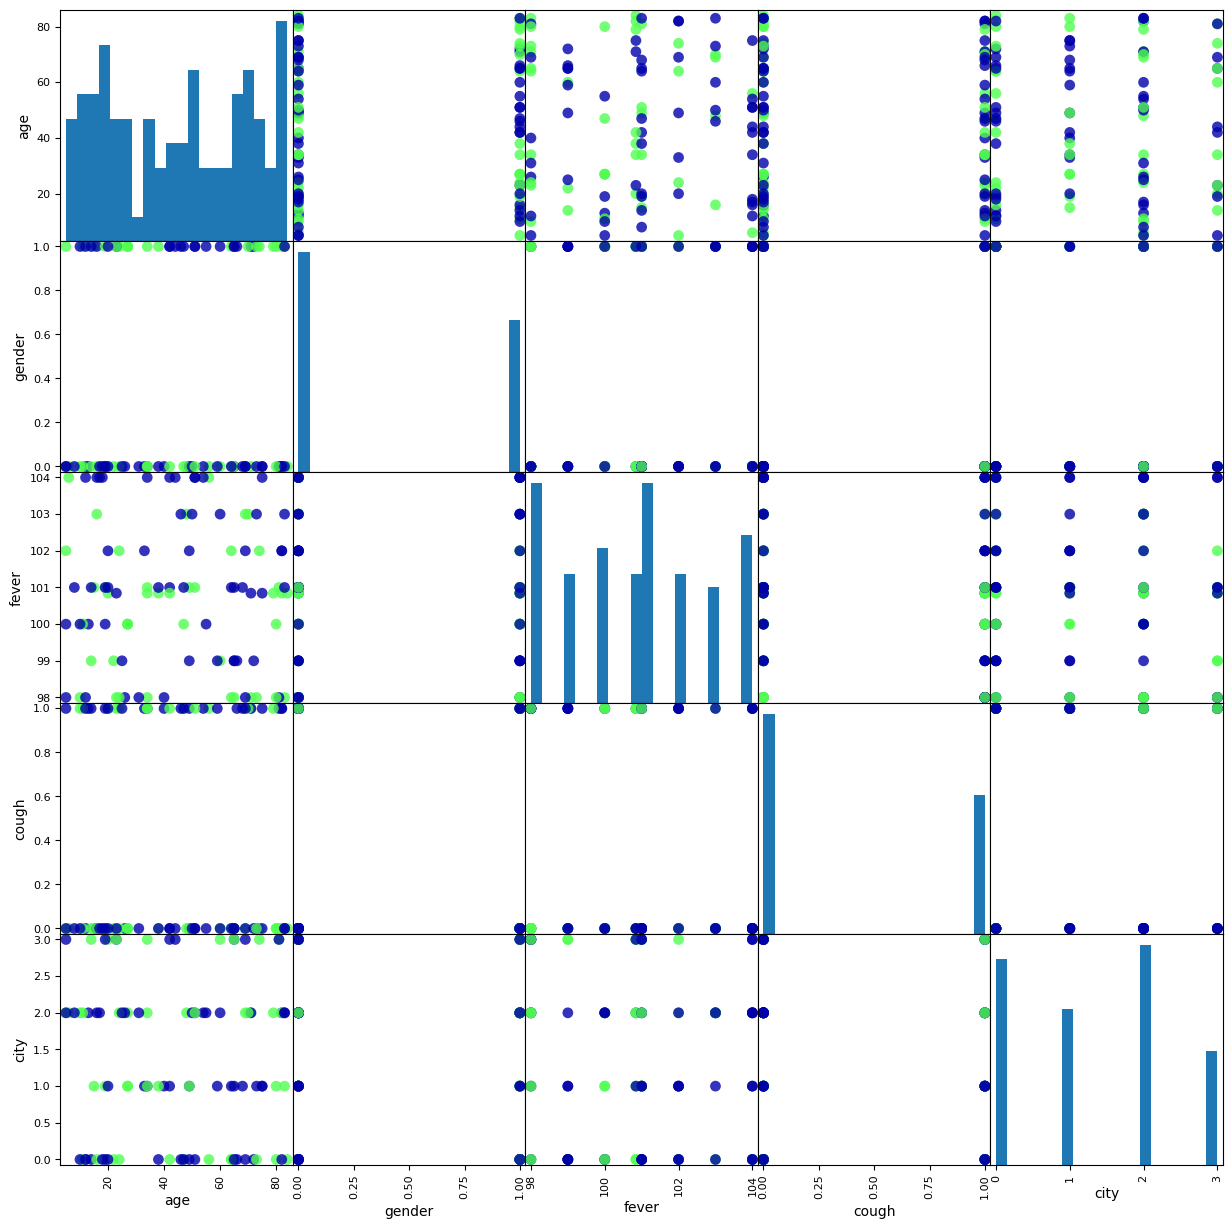

In [28]:

pd.plotting.scatter_matrix(x_train,c=y_train,figsize=(15,15),
                          marker='o',hist_kwds={'bins':20},s=60,
                          alpha=.8,cmap=mglearn.cm3)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(x_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
y_pred=knn.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.5

In [53]:
df=pd.read_csv("titanic - titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
df=df.dropna()

In [55]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [56]:
df=df.drop(columns=["Name","Cabin"])

In [57]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
12,904,1,1,female,23.0,1,0,21228,82.2667,S
14,906,1,1,female,47.0,1,0,W.E.P. 5734,61.1750,S
24,916,1,1,female,48.0,1,3,PC 17608,262.3750,C


In [58]:
df["Sex"]=lb.fit_transform(df["Sex"])
df["Ticket"]=lb.fit_transform(df["Ticket"])
df["Embarked"]=lb.fit_transform(df["Embarked"])

In [59]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
12,904,1,1,0,23.0,1,0,32,82.2667,2
14,906,1,1,0,47.0,1,0,65,61.1750,2


In [60]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Survived"]),df["Survived"],test_size=0.2,random_state=0)

In [61]:
import mglearn

array([[<Axes: xlabel='PassengerId', ylabel='PassengerId'>,
        <Axes: xlabel='Pclass', ylabel='PassengerId'>,
        <Axes: xlabel='Sex', ylabel='PassengerId'>,
        <Axes: xlabel='Age', ylabel='PassengerId'>,
        <Axes: xlabel='SibSp', ylabel='PassengerId'>,
        <Axes: xlabel='Parch', ylabel='PassengerId'>,
        <Axes: xlabel='Ticket', ylabel='PassengerId'>,
        <Axes: xlabel='Fare', ylabel='PassengerId'>,
        <Axes: xlabel='Embarked', ylabel='PassengerId'>],
       [<Axes: xlabel='PassengerId', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Sex', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Ticket', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='Embarked', ylabel='Pclass'>],
       [<Axes: xlabel='PassengerId', ylabel='Sex'>,
       

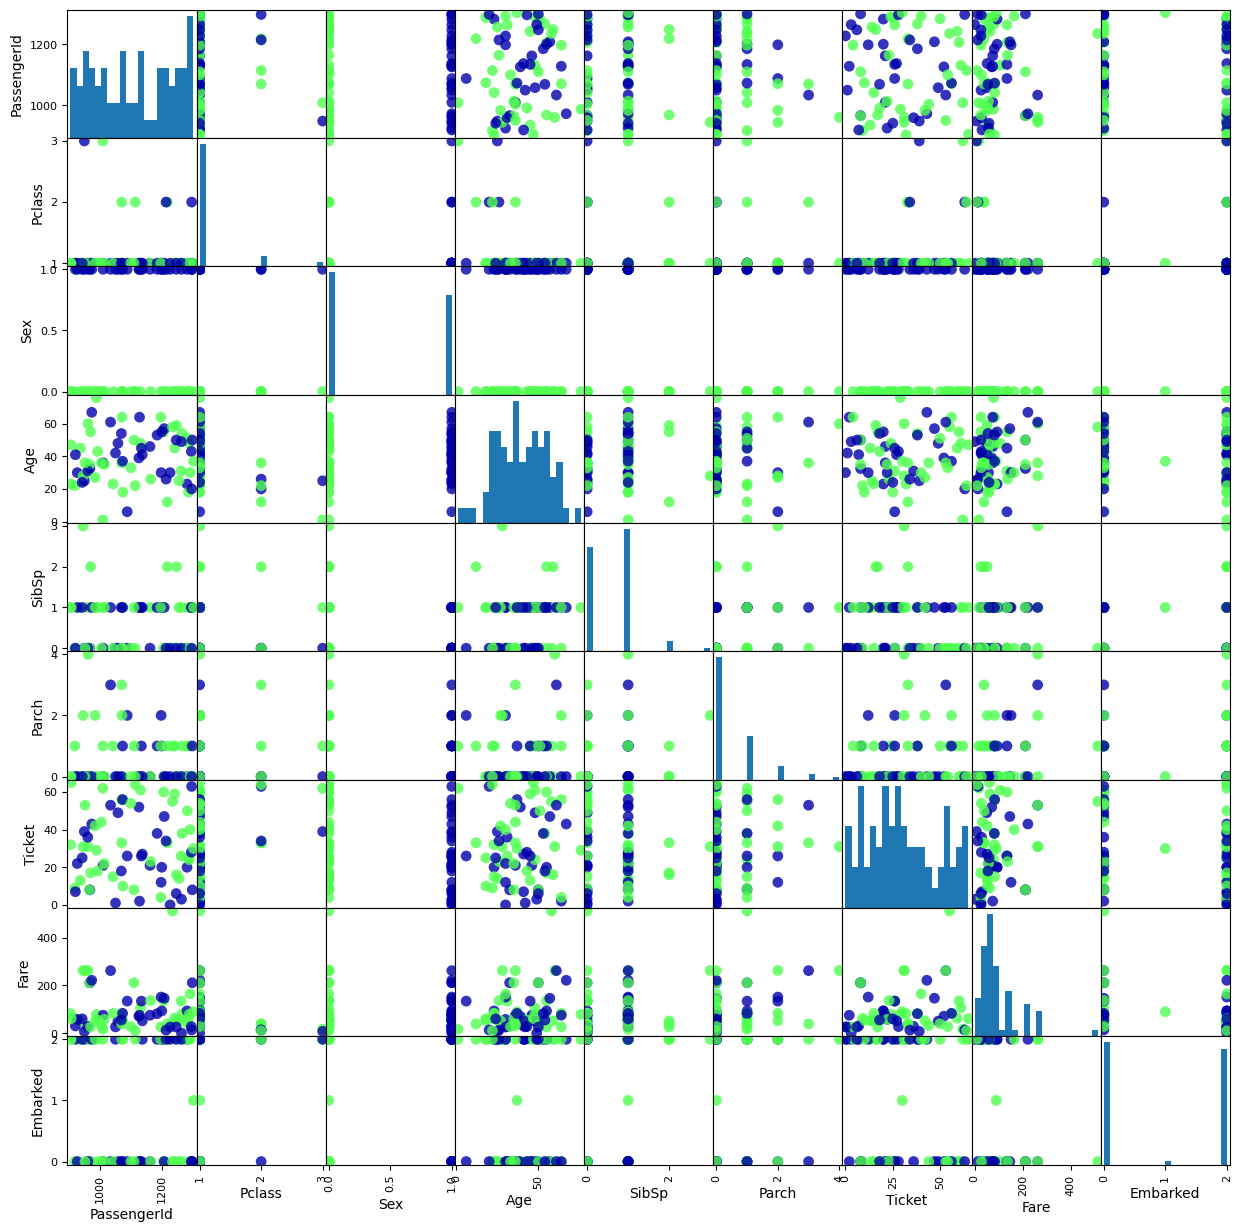

In [62]:
pd.plotting.scatter_matrix(x_train,c=y_train,figsize=(15,15),
                          marker='o',hist_kwds={'bins':20},s=60,
                          alpha=.8,cmap=mglearn.cm3)


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [64]:
knn.fit(x_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [65]:
y_pred=knn.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred)

0.5555555555555556

In [67]:
df=pd.read_csv("Attrition - Attrition (1).csv")

In [68]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [69]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
dflb.fit_transform(df[""])